In [41]:
# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [42]:
# importing the dataset
df = pd.read_csv (r'../CSV/FeaturesAAPL.csv', sep=',')
print(df.dtypes)

Timestamp       object
Week_Number      int64
Open           float64
High           float64
Low            float64
                ...   
% AVGPRICE     float64
% STD-5/1      float64
% STD-5/2      float64
% STD-10/1     float64
% STD-10/2     float64
Length: 90, dtype: object


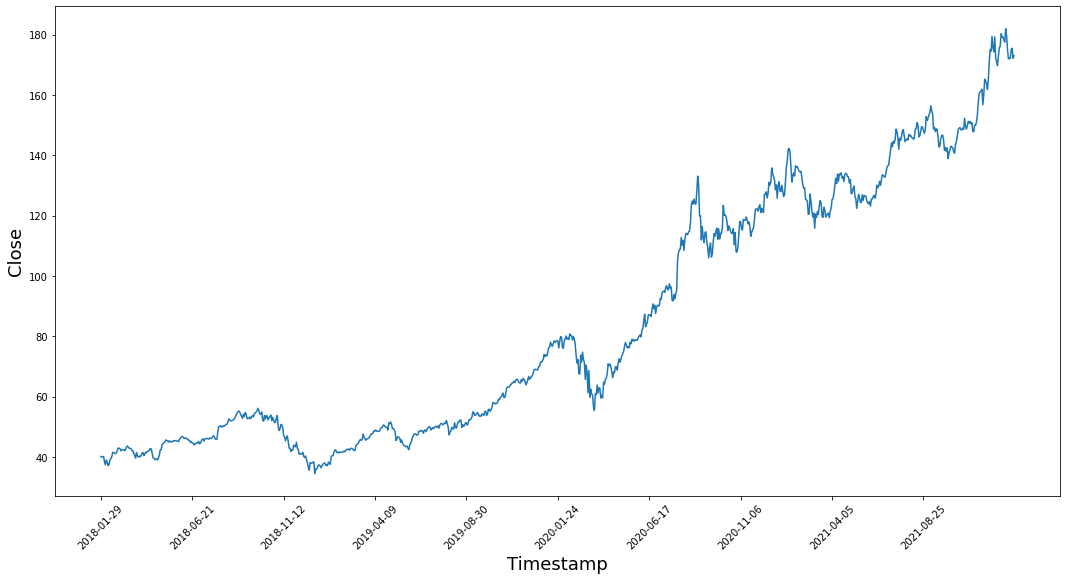

In [43]:
# preparing columns to use in model 
df = df.sort_values('Timestamp')
df.reset_index()
df = df.iloc[-1000:]
df_plot = df

# Plotting the data
plt.figure(figsize = (18,9))
plt.plot(range(df_plot.shape[0]),df_plot['Close'])
plt.xticks(range(0,df_plot.shape[0],100),df_plot['Timestamp'].loc[::100],rotation=45)
plt.xlabel('Timestamp',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.show()

In [44]:
# Variable and df preparation for scaling and dividing into sets
data = df_plot["Close"]
closing_price = data.values
split = int(len(df) * 0.75)
X_train = []
y_train = []

# Scaler
sc = MinMaxScaler(feature_range=(0, 1))
scaled_data  = sc.fit_transform(closing_price.reshape(-1,1))

# Train scaling
training_data = scaled_data[0:split, :]

for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])
       
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)


# TEST
test_data = scaled_data[split-60:, :]
X_test = []
y_test = closing_price[split:,]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(690, 60, 1)
(250, 60, 1)


In [45]:
# Building Model:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [46]:
# Compiling and fitting model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 50, batch_size = 8)

Epoch 1/50
87/87 [==============================] - 2s 28ms/step - loss: 0.0064
Epoch 2/50
87/87 [==============================] - 2s 28ms/step - loss: 0.0021
Epoch 3/50
87/87 [==============================] - 2s 28ms/step - loss: 0.0019
Epoch 4/50
87/87 [==============================] - 2s 28ms/step - loss: 0.0013
Epoch 5/50
87/87 [==============================] - 2s 28ms/step - loss: 0.0017
Epoch 6/50
87/87 [==============================] - 3s 29ms/step - loss: 0.0013
Epoch 7/50
87/87 [==============================] - 2s 28ms/step - loss: 0.0016
Epoch 8/50
87/87 [==============================] - 2s 28ms/step - loss: 0.0012
Epoch 9/50
87/87 [==============================] - 2s 28ms/step - loss: 0.0014
Epoch 10/50
87/87 [==============================] - 2s 29ms/step - loss: 0.0013
Epoch 11/50
87/87 [==============================] - 3s 29ms/step - loss: 0.0014
Epoch 12/50
87/87 [==============================] - 3s 29ms/step - loss: 0.0014
Epoch 13/50
87/87 [==================

In [47]:
# prediction with SC inversion
predictions = model.predict(X_test)
predictions = sc.inverse_transform(predictions)
predictions=np.transpose(predictions)[0]

print(predictions)

[127.97914  129.78648  132.45573  135.63907  138.31955  139.76823
 139.19685  136.67941  134.13828  132.51828  131.70886  132.20023
 133.25252  134.32158  134.91103  134.93382  134.58488  134.18076
 133.45728  132.26538  130.866    129.72679  128.30826  126.9799
 125.92687  124.4613   123.06265  123.259575 123.950905 124.05808
 123.31982  122.47055  120.87247  120.00841  119.67953  120.07117
 120.60671  121.587296 122.913216 123.96147  123.75309  122.69909
 122.07926  121.82104  121.3668   120.93546  120.74592  120.792465
 120.68079  120.88232  121.41883  122.574974 123.900406 125.293274
 126.86154  128.6854   129.89812  131.03654  131.4612   131.8363
 132.10231  132.396    132.33232  132.14723  131.67522  131.61229
 131.93773  132.34819  132.5297   132.4989   131.97942  131.5013
 130.31847  129.01028  128.28658  128.2555   127.98618  127.37298
 126.09485  125.11107  125.0637   125.38865  125.51034  125.38695
 125.634125 125.72844  125.979675 126.24169  126.424706 126.21199
 125.67086 

In [48]:
# RMSE calculation
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

4.911199060500683

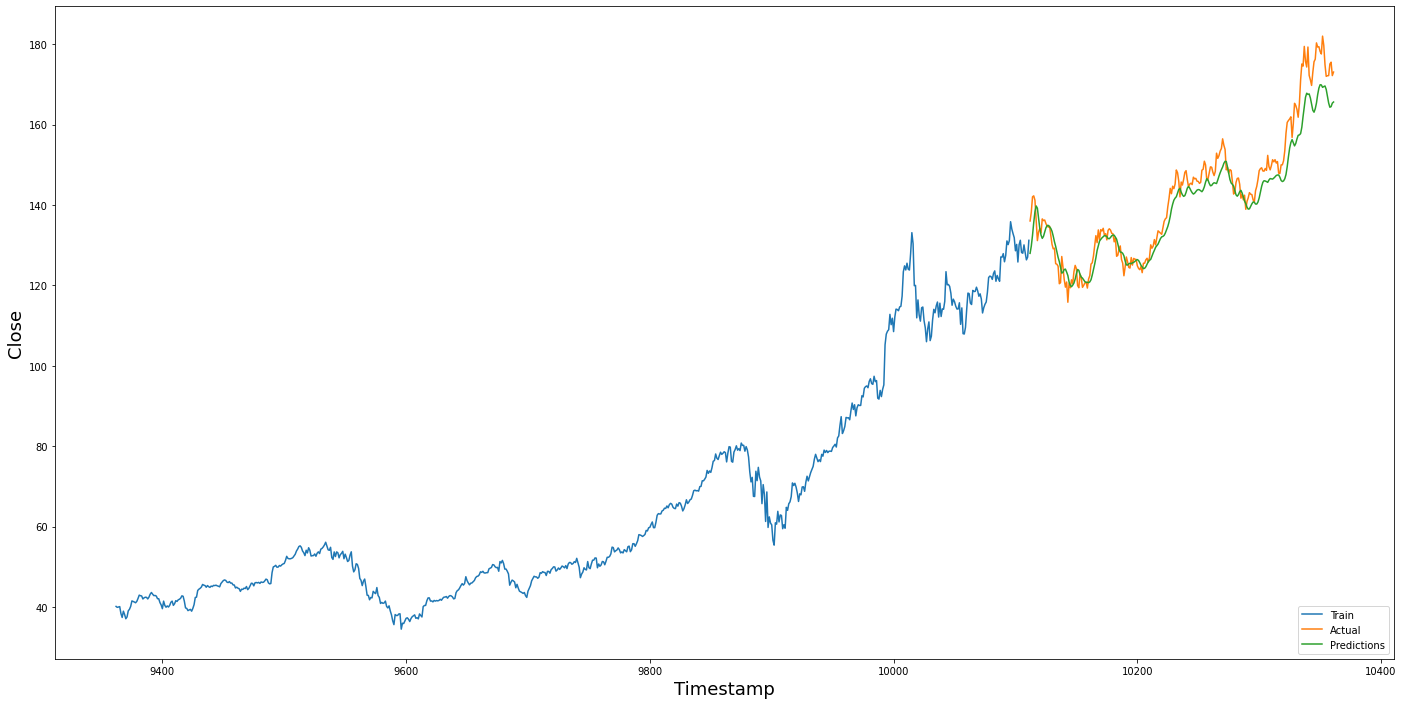

In [49]:
# preparing data for plotting
train = pd.DataFrame(data[:split])
valid = pd.DataFrame(data[split:])
valid["Predictions"] = predictions

# Plotting
plt.figure(figsize = (24,12))
plt.xlabel('Timestamp',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.plot(train)
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Actual", "Predictions"], loc = "lower right")
plt.show()

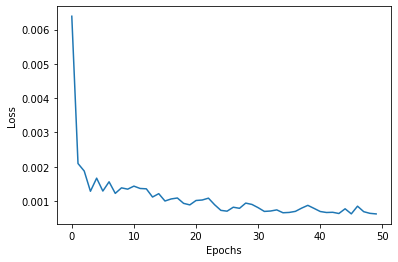

In [50]:
# Plotting the loss convergence
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [66]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets
